In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string

In [45]:
df = pd.read_csv('data/songs_with_lyrics.csv')
df

,Unnamed: 0,year,rank,title,artist,lyrics
0,0,1950,1,The Fat Man,Fats Domino,"They call, they call me the fat man\n'Cause I ..."
1,1,1950,2,Please Send Me Someone To Love,Percy Mayfield,"Understanding and peace of mind\nBut, if it's ..."
2,2,1950,3,Teardrops From My Eyes,Ruth Brown,I think of you\nAnd that's the time\nI feel so...
3,3,1950,4,Mona Lisa,Nat King Cole,"Mona Lisa, Mona Lisa, men have named you\nYou'..."
4,4,1950,5,Tennessee Waltz,Patti Page,When an old friend I happened to see\nI Introd...
...,...,...,...,...,...,...
7694,6998,2019,1,Old Town Road (Remix),Lil Nas X (feat. Billy Ray Cyrus),NEXT_TIME
7695,6999,2019,3,Señorita,Shawn Mendes & Camila Cabello,NEXT_TIME
7696,7000,2019,5,I Don't Care,Ed Sheeran and Justin Bieber,NEXT_TIME
7697,7001,2019,7,7 rings,Ariana Grande,NEXT_TIME


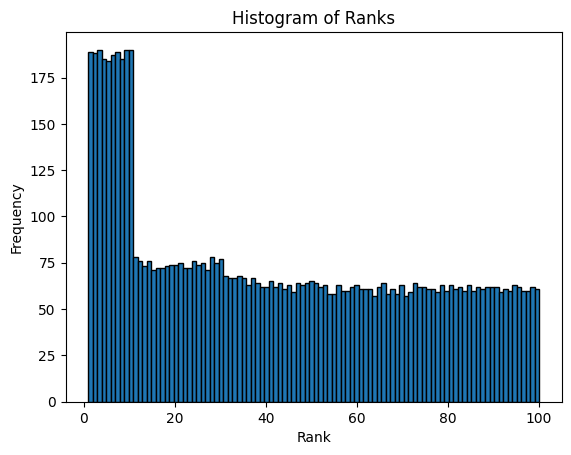

In [46]:
plt.hist(df['rank'], bins=100, edgecolor='black')
plt.title('Histogram of Ranks')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.savefig("plots/ranks.png")
plt.show()

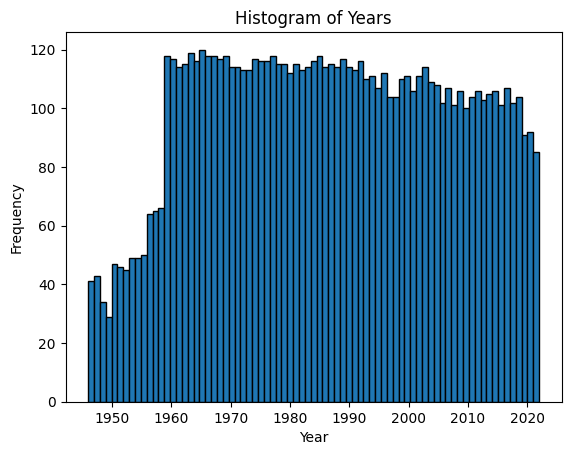

In [47]:
plt.hist(df['year'], bins=len(df['year'].unique()), edgecolor='black')
plt.title('Histogram of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.savefig("plots/years.png")
plt.show()

In [48]:
all_lyrics = ' '.join(df['lyrics'])
words = []
stopw = set(stopwords.words('english'))
punkt = set(string.punctuation)
for word in all_lyrics.lower().split():
    if word not in stopw and word not in punkt:
        words.append(word)

In [49]:
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
print("Most Common Words in Lyrics:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most Common Words in Lyrics:
next_time: 6222
love: 3012
i'm: 2893
—: 2412
like: 2320
know: 1896
got: 1685
get: 1660
(2018): 1435
one: 1395
come: 1293
lyrics: 1229
oh,: 1172
go: 1064
find: 1019
can't: 988
make: 971
want: 922
yeah,: 915
never: 911


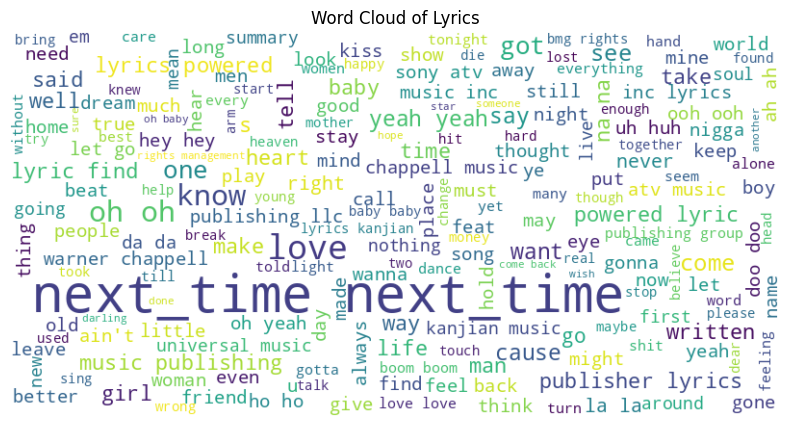

In [50]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.savefig('plots/wordcloud_lyrics.png')
plt.show()

In [51]:
all_titles = ' '.join(df['title'])
words = []
for word in all_titles.lower().split():
    if word not in stopw and word not in punkt:
        words.append(word)

In [52]:
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
print("Most Common Words in titles:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most Common Words in titles:
love: 549
like: 128
get: 119
one: 106
i'm: 105
time: 102
heart: 99
baby: 94
girl: 88
can't: 84
go: 83
night: 83
want: 80
way: 76
back: 75
little: 74
good: 73
got: 70
man: 69
rock: 64


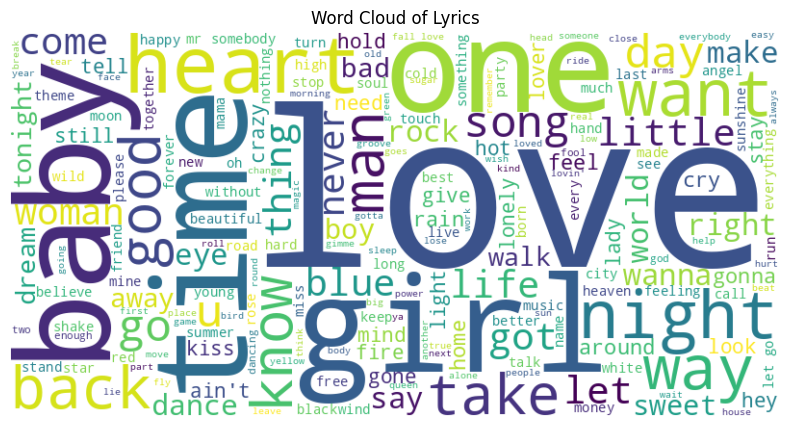

In [53]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.savefig('plots/wordcloud_titles.png')
plt.show()

In [71]:
s = set(df['artist'].unique())

In [74]:
'Paul' in s

True

In [76]:
releases = []
for artist in df['artist'].unique():
    if artist == "? and the Mysterians":
        continue
    count = len(df[df['artist'].str.contains(artist)].drop_duplicates(subset=['title']))
    releases.append({'artist': artist, 'count': count})

C:\Users\vyach\AppData\Local\Temp\ipykernel_3112\1719233981.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = len(df[df['artist'].str.contains(artist)].drop_duplicates(subset=['title']))


In [78]:
artists = sorted(releases, key=lambda x: x['count'], reverse=True)
print("The Most Prolific Artists: ")
for i in range(15):
    print(f"{artists[i]['artist']}, count: {artists[i]['count']}")

The Most Prolific Artists: 
M, count: 927
Paul, count: 78
Joe, count: 58
Frank, count: 53
Madonna, count: 36
Drake, count: 33
Elvis Presley, count: 32
Dion, count: 32
Beatles, count: 31
War, count: 29
Mariah Carey, count: 29
Elton John, count: 28
Rihanna, count: 28
Michael Jackson, count: 27
Janet, count: 27
